Class 1 columns: 3
Class 2 columns: 3
Class 3 columns: 3
Covariance Matrix:
[[1.05643459e+04 4.84626161e+02]
 [4.84626161e+02 4.84656165e+05]]

Mean of the data:
[ 365.43903481 1687.94256662]
Converged in 9 iterations!


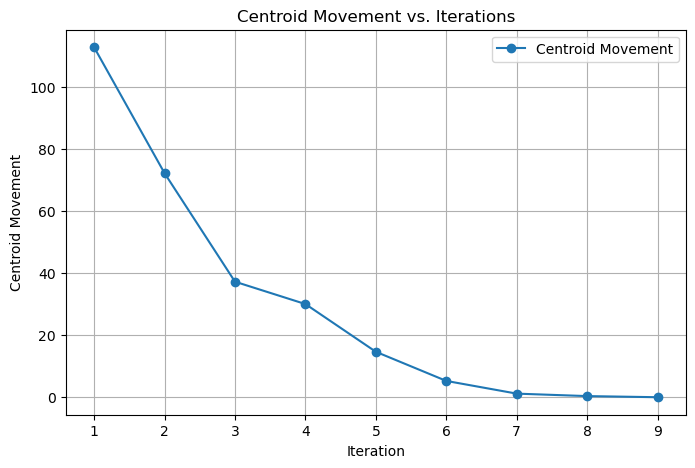

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def mahalanobis_dist(x1, x2, cov_matrix):
    mean_diff = x1 - x2  
    cov_matrix_inv = np.linalg.inv(cov_matrix)  
    distance = np.sqrt(np.dot(np.dot(mean_diff.T, cov_matrix_inv), mean_diff))
    return distance


def KMeansClustering(X, K, maxIteration, mod: bool, tolerance=1e-4):
    m = X.shape[0]
    np.random.seed(42)
    centroids = X[np.random.choice(m, K, replace=False)]
    idx = np.zeros(m, dtype=int)
    prevCentroid = np.zeros_like(centroids)
    cov = np.cov(X, rowvar=False)
    print("Covariance Matrix:")
    print(cov)
    print("\nMean of the data:")
    print(np.mean(X, axis=0))
    iteration_list = []
    centroid_movements = []

    for i in range(maxIteration):
        if mod:
            dist = np.zeros((m, K))
            for j in range(m):
                for k in range(K):
                    dist[j, k] = mahalanobis_dist(X[j], centroids[k], cov)
        else: 
            dist = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        idx = np.argmin(dist, axis=1)
        prevCentroid = centroids.copy()
        for k in range(K):
            points = X[idx == k]
            if len(points) > 0:
                centroids[k] = np.mean(points, axis=0)
        centroid_movement = np.linalg.norm(centroids - prevCentroid)
        iteration_list.append(i + 1)
        centroid_movements.append(centroid_movement)
        if centroid_movement < tolerance:
            print(f"Converged in {i + 1} iterations!")
            break


    plt.figure(figsize=(8, 5))
    plt.plot(iteration_list, centroid_movements, marker='o', label="Centroid Movement")
    plt.title("Centroid Movement vs. Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Centroid Movement")
    plt.grid(True)
    plt.legend()
    plt.show()
        
    return centroids, idx


class1 = pd.read_csv('desktop/internship/dataset/rd_group5/class1.txt', delimiter=' ', header=None)
class2 = pd.read_csv('desktop/internship/dataset/rd_group5/class2.txt', delimiter=' ', header=None)
class3 = pd.read_csv('desktop/internship/dataset/rd_group5/class3.txt', delimiter=' ', header=None)


print(f"Class 1 columns: {class1.shape[1]}")
print(f"Class 2 columns: {class2.shape[1]}")
print(f"Class 3 columns: {class3.shape[1]}")


def assign_column_names(df):
    if df.shape[1] == 2:
        df.columns = ['X', 'Y']
    elif df.shape[1] > 2:
        df.columns = ['X', 'Y'] + [f'Feature_{i}' for i in range(3, df.shape[1] + 1)]
    return df

class1 = assign_column_names(class1)
class2 = assign_column_names(class2)
class3 = assign_column_names(class3)


combined_dataset = pd.concat([class1, class2, class3], ignore_index=True)


combined_dataset['Class'] = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])


X = combined_dataset[['X', 'Y']].values  # Use only 'X' and 'Y' for clustering

# Perform clustering with Euclidean distance
centroidEuclid, idxEuclid = KMeansClustering(X, 3, 100, mod=False)



Covariance Matrix:
[[1.05643459e+04 4.84626161e+02]
 [4.84626161e+02 4.84656165e+05]]

Mean of the data:
[ 365.43903481 1687.94256662]
Converged in 8 iterations!


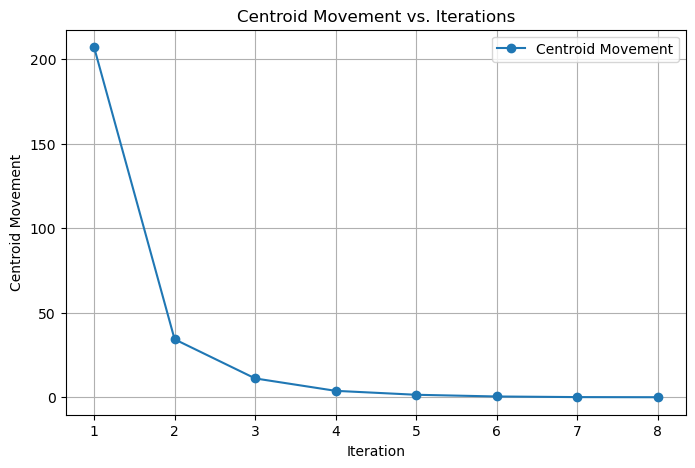

In [23]:
# Perform clustering with Mahalanobis distance
centroidMahalanobis, idxMahalanobis = KMeansClustering(X, 3, 100, mod=True)# Plot Euclidean results

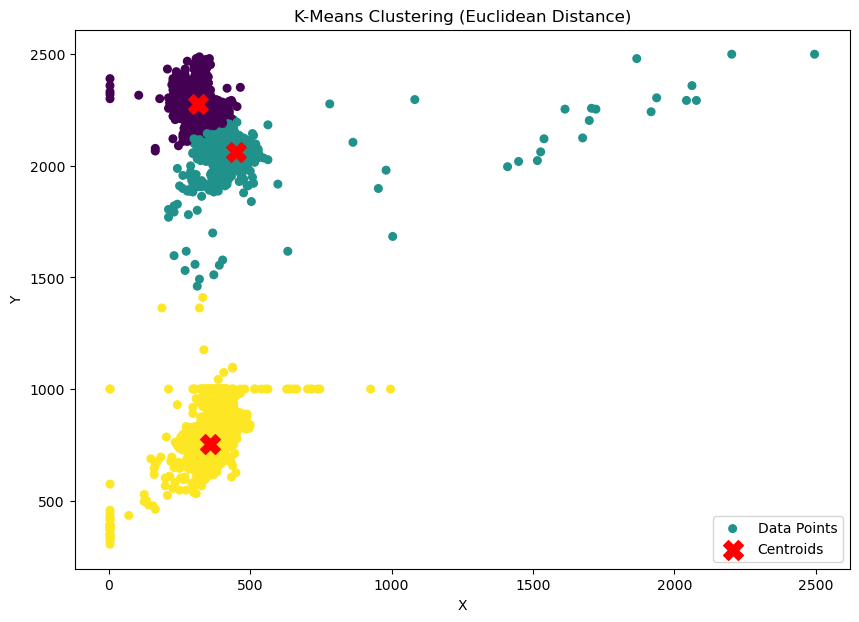

In [24]:

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=idxEuclid, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidEuclid[:, 0], centroidEuclid[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (Euclidean Distance)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()# Plot Mahalanobis results


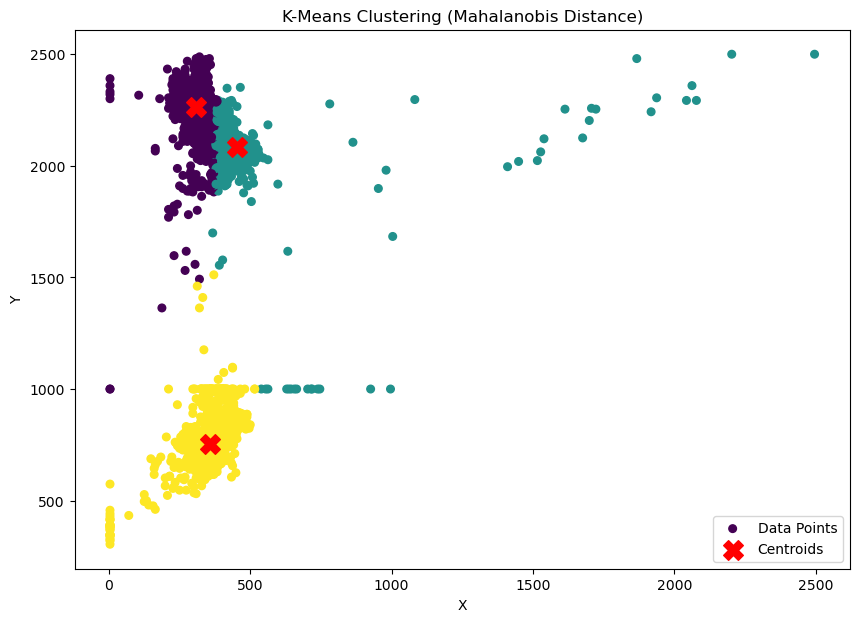

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=idxMahalanobis, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidMahalanobis[:, 0], centroidMahalanobis[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (Mahalanobis Distance)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()